In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./Downloads/facebook_ads_data.csv')
df

In [25]:
# Gruparea datelor dupa zile si creearea a doua grafice pentru datele grupate: 
daily_stats = df.groupby('ad_date')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
daily_stats

,total_spend,total_impressions,total_clicks,total_value
ad_date,,,,
2020-11-11,1.89,1800,45,2.38
2020-11-12,23.00,10473,397,21.13
2020-11-13,6.36,11669,451,9.77
2020-11-14,7.27,5005,392,12.67
2020-11-15,6.98,12465,657,10.96
...,...,...,...,...
2022-10-29,714.03,33358,115,680.34
2022-10-30,335.91,27562,69,472.61
2022-10-31,227.45,6054,58,191.87


In [19]:
daily_stats['romi'] = daily_stats['total_value'] / daily_stats['total_spend']
daily_stats = daily_stats.reset_index()
daily_stats

,ad_date,total_spend,total_impressions,total_clicks,total_value,romi
0,2020-11-11,1.89,1800,45,2.38,1.259259
1,2020-11-12,23.00,10473,397,21.13,0.918696
2,2020-11-13,6.36,11669,451,9.77,1.536164
3,2020-11-14,7.27,5005,392,12.67,1.742779
4,2020-11-15,6.98,12465,657,10.96,1.570201
...,...,...,...,...,...,...
542,2022-10-29,714.03,33358,115,680.34,0.952817
543,2022-10-30,335.91,27562,69,472.61,1.406954
544,2022-10-31,227.45,6054,58,191.87,0.843570
545,2022-11-01,0.00,0,0,0.00,NaN


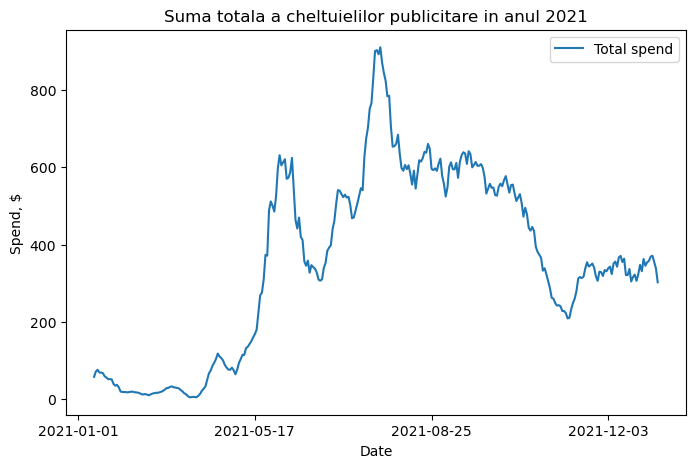

In [23]:
# Un grafic cu suma totala a cheltuielilor publicitare in anul 2021 folosind metoda rolling() pentru a afisa o medie mobila a cheltuielilor si a ROMI-ului

daily_stats_2021 = daily_stats[(daily_stats['ad_date'] >= '2021-01-01') & (daily_stats['ad_date'] <= '2021-12-31')]
plt.figure(figsize=(8,5), dpi=100)
plt.plot(daily_stats_2021['ad_date'], daily_stats_2021['total_spend'].rolling(10).mean(), label='Total spend')
plt.legend()
plt.title('Suma totala a cheltuielilor publicitare in anul 2021')
plt.xlabel('Date')
plt.ylabel('Spend, $')
plt.xticks(list(daily_stats_2021['ad_date'])[::100])
plt.show()

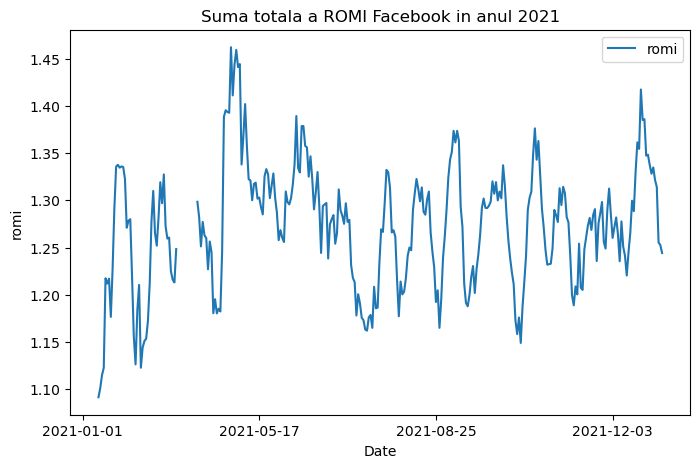

In [27]:
# Un grafic cu ROMI-ul zilnic in anul 2021 folosind metoda rolling() pentru a afisa o medie mobila a cheltuielilor si a ROMI-ului.
plt.figure(figsize=(8,5), dpi=100)
plt.plot(daily_stats_2021['ad_date'], daily_stats_2021['romi'].rolling(10).mean(), label='romi')
plt.legend()
plt.title('Suma totala a ROMI Facebook in anul 2021')
plt.xlabel('Date')
plt.ylabel('romi')
plt.xticks(list(daily_stats_2021['ad_date'])[::100])
plt.show()

In [29]:
# Gruparea datelor dupa numele companiei si creearea a doua grafice:
campaign_stats = df.groupby('campaign_name')[['total_spend', 'total_value']].sum()
campaign_stats

,total_spend,total_value
campaign_name,,
Brand,539.92,670.15
Crazy discounts,2175.29,2583.59
Discounts,2856.39,3516.27
Electronics,23920.42,29169.38
Expansion,67212.82,83288.66
Hobbies,11326.97,13974.63
Lookalike,63631.09,80234.70
New items,2936.97,3742.05
Promos,4993.84,8793.77


<Axes: xlabel='total_spend', ylabel='campaign_name'>

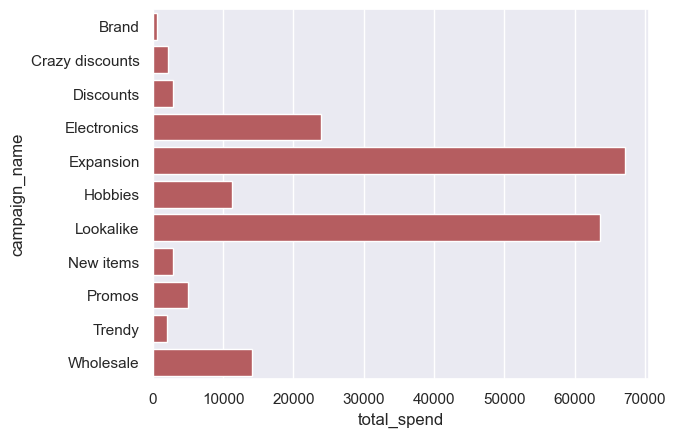

In [45]:
# Un grafic cu suma totala a cheltuielilor publicitare pentru fiecare companie:
sns.set_theme()

sns.barplot(x='total_spend', y='campaign_name', data=campaign_stats, color="r")

<Axes: xlabel='ROMI', ylabel='campaign_name'>

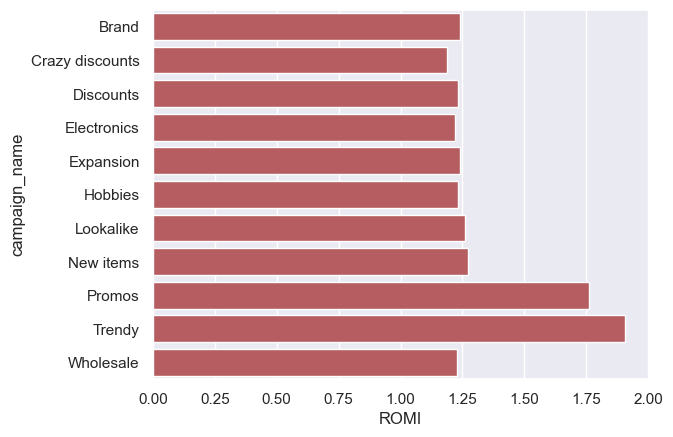

In [43]:
# Un grafic cu ROMI-ul total pentru fiecare companie:
campaign_stats['ROMI'] = campaign_stats['total_value'] / campaign_stats['total_spend']
campaign_stats
sns.barplot(x='ROMI', y='campaign_name', data=campaign_stats, color="r")

<Axes: xlabel='campaign_name', ylabel='romi'>

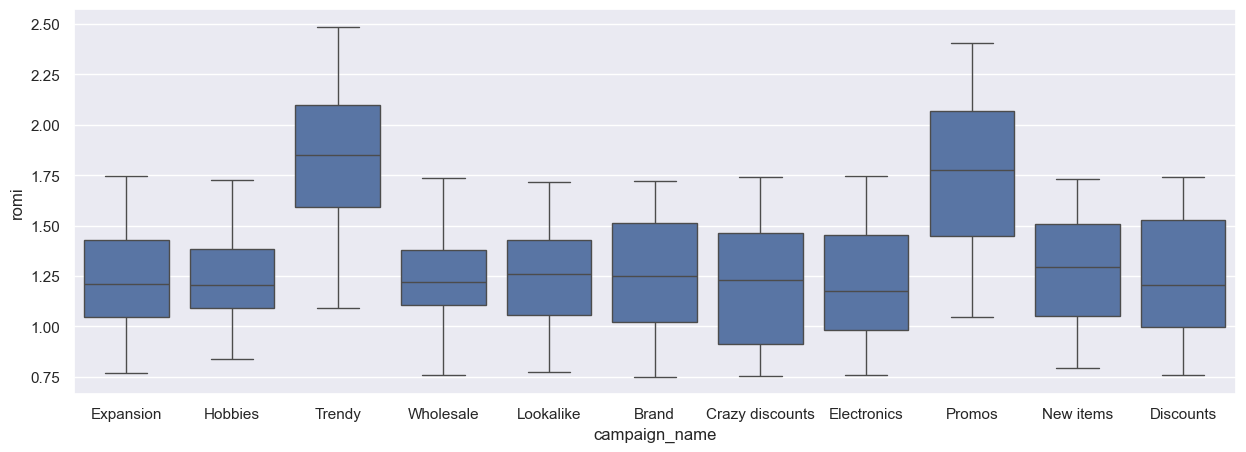

In [47]:
# Utilizand un box plot, determinam distributia ROMI-ului zilnic in fiecare companie (dupa numele companiei):
plt.figure(figsize=(15,5), dpi=100)

sns.boxplot(x="campaign_name", y="romi", data=df)

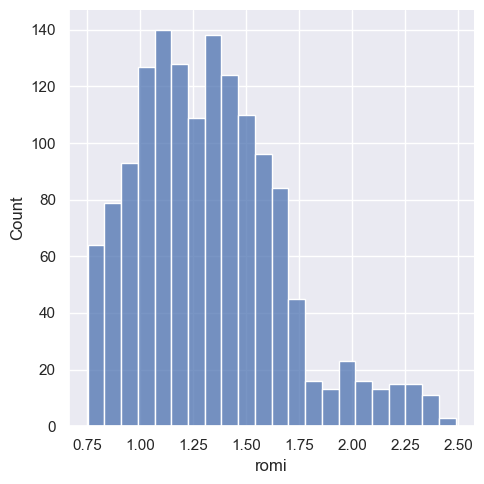

In [41]:
# Histograma cu distributia valorilor ROMI din tabelul facebook_ads_data.csv:
sns.displot(data=df, x='romi')

<Axes: >

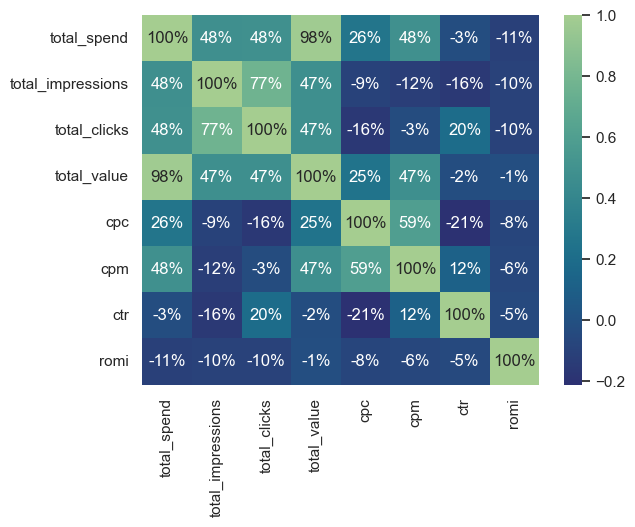

In [49]:
# Heat map a corelatiei intre toti indicatorii numerici din tabelul facebook_ads_data.csv. Care indicatori au cea mai mare și cea mai mică corelație? Cu ce corelează “total_value”?
cmap= sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.0%', cmap='crest_r')

